### Retrieval - Index of sentences 2022
outputs: unique_retrieved_sent22.csv (50000 sentences retrieived with BM25 wrt ti the queries)

##### importing libraries

In [120]:
import warnings
warnings.filterwarnings("ignore")

In [121]:
import pyterrier as pt
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import string
import re
from pyterrier.measures import *
from sklearn.feature_extraction.text import TfidfVectorizer
import time
from pandarallel import pandarallel #to parallelize operations on dataframe for efficiency improving
import fasttext
import spacy
nlp=spacy.load('en_core_web_sm')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
from itertools import combinations
import tensorflow as tf
from tensorflow.keras import activations, optimizers, losses
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
import pickle

from tensorflow.keras.models import load_model

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [123]:
if not pt.started():
  pt.init()

In [5]:
dataset = pt.get_dataset('irds:argsme/2020-04-01/processed/touche-2022-task-1')

In [125]:
pt_index_path_sent = '/Users/juliabuixuan/Desktop/TOUCHE/index22sent'
 # if you already have the index, use it.
index_ref = pt.IndexRef.of(pt_index_path_sent + "/data.properties")
index = pt.IndexFactory.of(index_ref)

In [126]:
print(index.getCollectionStatistics()) 

Number of documents: 5337409
Number of terms: 327395
Number of postings: 45957251
Number of fields: 0
Number of tokens: 49800997
Field names: []
Positions:   false



### Retrieval

The Stance present in the retrievd dataset, refers to the stance between the premises (text, sentence) and the corresponding conclusion within the same document. It is not the stance we aim to predit later, between the query and the text. So we should not consider it.

In [128]:
DLM  = pt.BatchRetrieve(index, wmodel="DirichletLM")
ret = DLM.transform(dataset.get_topics('title')) #queries
print("Shape of the retrieved df:", ret.shape) 

Shape of the retrieved df: (50000, 6)


In [8]:
# br = pt.BatchRetrieve(index, wmodel="BM25")
# ret = br.transform(dataset.get_topics('title')) #queries
# print("Shape of the retrieved df:", ret.shape) 

Shape of the retrieved df: (50000, 6)


In [129]:
ret

,qid,docid,docno,rank,score,query
0,1,4985300,Sff0947ec-A46d54897__PREMISE__34,0,9.095028,should teachers get tenure
1,1,4852132,Sc065954f-A24a16870__PREMISE__38,1,9.076845,should teachers get tenure
2,1,4852137,Sc065954f-A24a16870__PREMISE__43,2,9.064410,should teachers get tenure
3,1,4852192,Sc065954f-Ae72bc9c6__PREMISE__43,3,9.064410,should teachers get tenure
4,1,4852109,Sc065954f-A24a16870__PREMISE__15,4,9.002820,should teachers get tenure
...,...,...,...,...,...,...
49995,50,2710569,S61de83bd-Abd9cb253__PREMISE__21,995,1.883751,should everyone get a universal basic income
49996,50,2792381,S3f4925ac-A256cae33__PREMISE__43,996,1.883751,should everyone get a universal basic income
49997,50,3048279,S4aa1f178-Af544645c__PREMISE__19,997,1.883751,should everyone get a universal basic income
49998,50,3384770,S57f3b921-A835a8eda__PREMISE__2,998,1.883751,should everyone get a universal basic income


In [131]:
ret.to_csv("DMunique_retrieved_sent22.csv", index = False)

In [10]:
#ret.to_csv("unique_retrieved_sent22.csv", index = False) #save the dataframe with retrived sentences NO DUPLICATES

now go to 01.ipybn and merge with sentences text

In [ ]:
# ret.to_csv("retrieved_sent22.csv", index = False) #save the dataframe with retrived sentences

In [ ]:
#read the retreived merged with text and stance

In [11]:
# ret = pd.read_csv("unique_merged_retreived_sent22.csv")

In [132]:
ret = pd.read_csv("DMunique_merged_retreived_sent22.csv")

In [133]:
ret.head()

,qid,docid,docno,rank,score,query,text,stance
0,1,4985300,Sff0947ec-A46d54897__PREMISE__34,0,9.095028,should teachers get tenure,"[3]"" [C3]: Research supports tenure Not only have we established tenure does not help bad teachers keep their job, but there is abolutely no research that suggests students perform worse on standardized tests when taught by a tenured teacher, nor is there evidence that supports perform better with non-tenured teachers [2].",CON
1,1,4852132,Sc065954f-A24a16870__PREMISE__38,1,9.076845,should teachers get tenure,"This quote further proves why tenure is pretty much useless and unfair because teachers DO NOT NEED TENURE to continue their job as a teacher at their shchool, past school, future school, or school they are applying for.Reason 8 - With job protections granted through court rulings, collective bargaining, and state and federal laws, teachers today no longer need tenure to protect them from dismissal: ""For this reason, few other professions offer tenure because employees are adequately protected with existing laws.""",PRO
2,1,4852137,Sc065954f-A24a16870__PREMISE__43,2,9.064410,should teachers get tenure,"Stephey, ""A Brief History of Tenure,"" www.time.comRose Garrett, ""What Is Teacher Tenure?,"" www.education.comhttp://teachertenure.procon.org......""Rhee-Forming D.C. Schools,"" www.wsj.comSteven Brill, ""The Rubber Room,"" New YorkerTenure Reforms and NJSBA Policy: Report of the NJSBA Tenure Task Force,"" New Jersey School Boards Association website, www.njsba.orgScott McLeod, JD, PhD, ""Does Teacher Tenure Have a Future?,"" www.dangerouslyirrelevant.orgNanette Asimov, ""Teacher Job Security Fuels Prop.",PRO
3,1,4852192,Sc065954f-Ae72bc9c6__PREMISE__43,3,9.064410,should teachers get tenure,"Stephey, ""A Brief History of Tenure,"" www.time.comRose Garrett, ""What Is Teacher Tenure?,"" www.education.comhttp://teachertenure.procon.org...""Rhee-Forming D.C. Schools,"" www.wsj.comSteven Brill, ""The Rubber Room,"" New YorkerTenure Reforms and NJSBA Policy: Report of the NJSBA Tenure Task Force,"" New Jersey School Boards Association website, www.njsba.orgScott McLeod, JD, PhD, ""Does Teacher Tenure Have a Future?,"" www.dangerouslyirrelevant.orgNanette Asimov, ""Teacher Job Security Fuels Prop.",PRO
4,1,4852109,Sc065954f-A24a16870__PREMISE__15,4,9.002820,should teachers get tenure,"(http://teachertenure.procon.org......) This means that most teachers OF SUCH A LARGE PERCENTAGE are not in favor of the teacher tenure.Reason 4 - Teacher tenure does nothing to promote the education of children: ""Former DC Schools Chancellor Michelle Rhee said in 2008, ""Tenure is the holy grail of teacher unions, but it has no educational value for kids; it only benefits adults.”(""Rhee-Forming D.C. Schools,"" www.wsj.com).",PRO


In [135]:
ret[ret['qid'] == 7].head()

qid    docid                             docno  rank     score   
6000    7   270241   Sedcd04e0-A9bfcee8f__PREMISE__1     0  6.983190  \
6001    7  2773627   S8fa3a9aa-Aca247fb3__PREMISE__3     1  6.781653   
6002    7  3202521   S8a2c0d8d-Ae1cd1e84__PREMISE__1     2  6.729935   
6003    7  3338099  Sbe8096c7-A54bdfe26__PREMISE__14     3  6.717247   
6004    7  3150913   S9762761d-A7a996a17__PREMISE__2     4  6.346250   

                                                                   query   
6000  should felons who have completed their sentence be allowed to vote  \
6001  should felons who have completed their sentence be allowed to vote   
6002  should felons who have completed their sentence be allowed to vote   
6003  should felons who have completed their sentence be allowed to vote   
6004  should felons who have completed their sentence be allowed to vote   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

##### Some statistics and exploartion 

In [13]:
# Group by "query" and calculate statistics for the "score" column
grouped_stats = ret.groupby("qid")["score"].agg(["mean", "median", "std", "min", "max", "count"])
grouped_stats_sorted = grouped_stats.sort_values(by="mean", ascending=True) #from lowest to highest mean score
# Display the statistics
# grouped_stats_sorted

How many con/pro for each query?

In [14]:
# result = ret.groupby(['qid', 'stance']).size().unstack(fill_value=0)
# result_percentage = result.apply(lambda row: row / row.sum() * 100, axis=1)
# result_percentage = result_percentage.sort_values(by="CON", ascending=False)
# result_percentage

stance,CON,PRO
qid,,
34,54.4,45.6
36,52.5,47.5
44,52.4,47.6
23,52.3,47.7
37,51.9,48.1
1,51.8,48.2
48,51.6,48.4
42,51.2,48.8
15,51.0,49.0


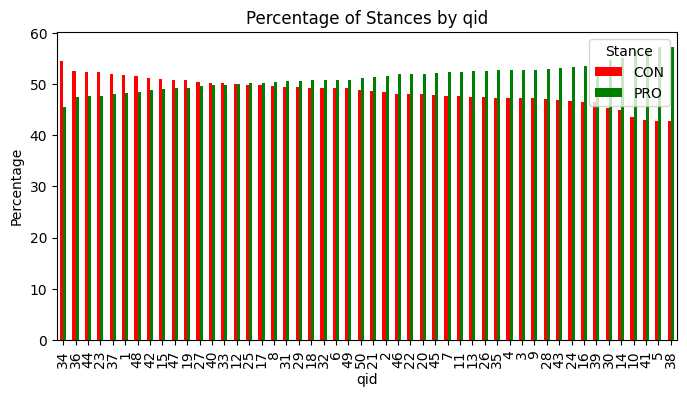

In [15]:
# # plot
# result_percentage.plot(kind='bar', figsize=(8, 4), color=['red', 'green'])

# plt.title('Percentage of Stances by qid')
# plt.xlabel('qid')
# plt.ylabel('Percentage')
# plt.legend(title='Stance', loc='upper right')
# plt.show()

In [18]:
ret[ret['qid'] == 1].head(10)

,qid,docid,docno,rank,score,query,text,stance
0,1,4852096,Sc065954f-A6deb09b6__CONC__1,0,31.873663,should teachers get tenure,There should not be a teacher tenure.,CON
1,1,2130092,S51530f3f-Ab10cafd7__PREMISE__1,1,29.939285,should teachers get tenure,This is a debate of tenures for teachers.,PRO
2,1,1476828,Sb0680508-Aa5189771__PREMISE__1,2,29.274197,should teachers get tenure,Here are some facts against Teacher Tenure: Teacher tenure creates complacency because teachers know they are unlikely to lose their jobs.,CON
3,1,2074507,Sbfe05689-Ac1b8b63e__PREMISE__51,3,29.152149,should teachers get tenure,"If only competent teachers are given tenure, this eliminates the problem of incompetent teachers having tenure.",PRO
4,1,4852159,Sc065954f-A39b0539e__PREMISE__14,4,28.332152,should teachers get tenure,Teacher tenure protects the academic freedom of teachers.,CON
5,1,2130038,S51530f3f-A6ac2dcba__PREMISE__9,5,28.226263,should teachers get tenure,What happens if teachers are not protected by tenures?,CON
6,1,2130041,S51530f3f-A6ac2dcba__PREMISE__12,6,28.226263,should teachers get tenure,"Thus, tenures do help teachers make more money.",CON
7,1,2130081,S51530f3f-Ad9a140f__PREMISE__1,7,28.226263,should teachers get tenure,I am for the removal of tenures for teachers.,PRO
8,1,4985273,Sff0947ec-A46d54897__PREMISE__6,8,28.226263,should teachers get tenure,"Before tenure, teachers could be fired for any reason.",CON
9,1,4985297,Sff0947ec-A46d54897__PREMISE__31,9,28.226263,should teachers get tenure,"Tenure does not ""protect"" ""burnt-out"" teachers either.",CON


In [17]:
pd.set_option('display.max_colwidth', None)

In [19]:
ret[ret['qid']==2].head(10)

,qid,docid,docno,rank,score,query,text,stance
1000,2,536511,S6aa773f4-A90029182__PREMISE__7,0,27.820105,is vaping with e cigarettes safe,"The idea that vaping can promote cigarette smoking is not good news, especially to our youth.",CON
1001,2,4002675,S1efaccce-A3955662b__PREMISE__4,1,25.466657,is vaping with e cigarettes safe,Go vape some more hash.,CON
1002,2,2620051,S65de0e0f-A9228bfd0__PREMISE__7,2,23.921113,is vaping with e cigarettes safe,What if that person is also smoking or vaping?,CON
1003,2,3733416,Sa072f281-A9b43185f__PREMISE__1,3,23.921113,is vaping with e cigarettes safe,Ayy vape nashyon!!!,PRO
1004,2,3943643,Sebbaf687-Ab592608c__CONC__1,4,23.921113,is vaping with e cigarettes safe,kids shouldent vape,CON
1005,2,4128269,Se435a482-A57541090__CONC__1,5,23.921113,is vaping with e cigarettes safe,Should E-cigs and vapes be regulated,CON
1006,2,4128271,Se435a482-A84859719__PREMISE__2,6,23.921113,is vaping with e cigarettes safe,There are no good ways to start vaping.,PRO
1007,2,3645370,Se4ac409a-Ae56a299d__PREMISE__33,7,23.296141,is vaping with e cigarettes safe,"I told you the reason why cigarettes are different is because they cannot be used safely, whilst drinking in moderation is safe, and driving safely is safe.Talking about harms to others.",CON
1008,2,4128282,Se435a482-A40fb3806__PREMISE__6,8,23.085484,is vaping with e cigarettes safe,"Juul for example is a good way to start vaping, A teen hobby that adds a sense of smoking cigarettes whilst it does contain harmful chemicals similar to cigarettes; ""Traditional cigarettes contain a laundry list of chemicals that are proven harmful, And e-cigarettes have some of these same chemicals. """,CON
1009,2,3733334,Sa072f281-Ad15a7ee4__PREMISE__48,9,22.552430,is vaping with e cigarettes safe,"""Jesus/Hitler Vape Naysh V/\",PRO


In [20]:
ret[ret['qid']==2].tail(10)

,qid,docid,docno,rank,score,query,text,stance
1990,2,3346868,S93b534e3-A358977c4__PREMISE__11,990,12.510704,is vaping with e cigarettes safe,"Also if you became technical, a drug could be considered alcohol and cigarettes.",CON
1991,2,3402628,S975324a1-A4ed847b6__PREMISE__5,991,12.510704,is vaping with e cigarettes safe,"This includes, but is not limited too: cigarettes, cigars, ""snuff"", etc.",PRO
1992,2,3443348,Sdb54ecb2-Aa0e92f8b__PREMISE__24,992,12.510704,is vaping with e cigarettes safe,Just look at how many Americans smoke cigarettes.,CON
1993,2,3454735,Sf7ea078e-Ab097814a__PREMISE__24,993,12.510704,is vaping with e cigarettes safe,Illegal Cigarettes: This argument does not link to my plan.,PRO
1994,2,3553750,S447b51d1-Acc3052de__PREMISE__8,994,12.510704,is vaping with e cigarettes safe,"In the status quo, smoking cigarettes is legal.",PRO
1995,2,3569177,S897490b1-A3a621143__PREMISE__1,995,12.510704,is vaping with e cigarettes safe,Unfortunately there still are cigarettes in the United States.,CON
1996,2,3601090,Scf23c500-A3b593a7__PREMISE__19,996,12.510704,is vaping with e cigarettes safe,Alcohol and cigarettes are an entirely seperate debate.,CON
1997,2,3645347,Se4ac409a-Ae56a299d__PREMISE__9,997,12.510704,is vaping with e cigarettes safe,Governments should ban bad things.I have shown that cigarettes do no good.,CON
1998,2,3645394,Se4ac409a-Ae56a299d__PREMISE__59,998,12.510704,is vaping with e cigarettes safe,The people are saying they don't want cigarettes.,CON
1999,2,3645453,Se4ac409a-A8a5a9ee2__PREMISE__54,999,12.510704,is vaping with e cigarettes safe,The harm of cigarettes is way out of proportion to the harms of everything else.,CON


### Stance prediction
Model classification, training a model based on (a sample of the) dataset from 2021 

X of the model = topic + premises

Vectorizer: tfidf
Models: MNB, RF

DistilBERT 
X when predicting = query + text

In [7]:
dataset21 = pt.get_dataset('irds:argsme/2020-04-01/touche-2021-task-1')

In [8]:
#iterator over the documents
corpus_iter = dataset21.get_corpus_iter()
corpus_list = list(corpus_iter)

argsme/2020-04-01/touche-2021-task-1 documents:   0%|          | 0/387740 [00:00<?, ?it/s]

argsme/2020-04-01/touche-2021-task-1 documents: 100%|██████████| 387740/387740 [00:46<00:00, 8406.63it/s] 


In [9]:
data = pd.DataFrame(corpus_list)

In [19]:
data.shape

(387740, 25)

In [10]:
pd.set_option("display.max_colwidth", None)

In [11]:
data.head()

,conclusion,premises,premises_texts,aspects,aspects_names,source_id,source_title,source_url,source_previous_argument_id,source_next_argument_id,...,source_text_premise_end,topic,acquisition,date,author,author_image_url,author_organization,author_role,mode,docno
0,school,"[(Done., ArgsMeStance.PRO, [])]",Done.,[],,Sb38112c8,Debate: school | Debate.org,https://www.debate.org/debates/school/3/,None,None,...,2670,school,2019-04-18 17:49:41+00:00,NaT,None,None,None,None,ArgsMeMode.discussion,Sb38112c8-A443a9828
1,school,"[(Let's get this over with., ArgsMeStance.PRO, [])]",Let's get this over with.,[],,Sb38112c8,Debate: school | Debate.org,https://www.debate.org/debates/school/3/,None,None,...,2598,school,2019-04-18 17:49:41+00:00,NaT,None,None,None,None,ArgsMeMode.discussion,Sb38112c8-A48f87c39
2,school,"[(You have not stated a resolution/position. You are merely looking for someone to do your H.W. for you. In a debate you must make a resolution, & take a position. Forums, Thata way -------------------> 2 doors down. Please don't put this in the debate section., ArgsMeStance.PRO, [])]","You have not stated a resolution/position. You are merely looking for someone to do your H.W. for you. In a debate you must make a resolution, & take a position. Forums, Thata way -------------------> 2 doors down. Please don't put this in the debate section.",[],,Sb38112c8,Debate: school | Debate.org,https://www.debate.org/debates/school/3/,None,None,...,2506,school,2019-04-18 17:49:41+00:00,NaT,None,None,None,None,ArgsMeMode.discussion,Sb38112c8-A85a910e8
3,school,"[(should schools have open campus? why or why not? who would it benefits the students and the school? or just the students? what if only the older ones got to to leave?, ArgsMeStance.CON, [])]",should schools have open campus? why or why not? who would it benefits the students and the school? or just the students? what if only the older ones got to to leave?,[],,Sb38112c8,Debate: school | Debate.org,https://www.debate.org/debates/school/3/,None,None,...,2221,school,2019-04-18 17:49:41+00:00,NaT,None,None,None,None,ArgsMeMode.discussion,Sb38112c8-A96d2d2c7
4,I will not contradict myself,"[(It seems we are at an impasse. 1. In Rounds 1-3, CON will ask PRO ten Yes/No questions per round. This rule Was violated by you. 2. In Rounds 2-4, PRO will answer all of CON's questions with Yes, No, or an explanation as to why neither answer would be completely correct. This Was violated by myself.Let me provide you with rules 10-11 10. If PRO EVER fails to abide by any rule, PRO automatically loses.11. If CON EVER fails to abide by any rule, CON automatically loses.The rules state ever, not that the rules are not inplay once a rule has been broken. However, You offered me an alternative when you told me to change my answer. Many answer are reanswered in these types of debates. http://www.debate.org...Whether you said this round or not is irrelevant seeing as that would be impossible.And Just to cover all my bases. 3. In Rounds 2-4, CON can point out any contradictions that he or she believes to be present in PRO's answers, citing all questions and answers involved in the contradiction. No new contradictions may be pointed out in Round 5.Because you have not specifically pointed out the contradiction none can be said now.The voters can decide whether the rules cancel out and Your lack to find a contradiction gives me the win, or we both are at fault causing a tie. We either tie or Pro wins. There is no room for you to win. So Feel free to contact me for another debate =D, ArgsMeStance.PRO, [])]","It seems we are at an impasse. 1. In Rounds 1-3, CON will ask PRO ten Yes/No questions per round. This rule Was violated by you. 2. In Rounds 2-4, PRO will answer all of CON's questions with Yes, No, or an explanation as to why neither answer would be completely correct. This Was violated by myself.Let me provide you with rules 10-11 10. If PRO EVER fails to abide by any rule, PRO automatically loses.11. If 

#### Classification models

In [9]:
#Functions to preprocess text
def extract_args_me_stance(input_string):
    pattern = re.compile(r'ArgsMeStance\.([a-zA-Z]+)')
    s = str(input_string[0][1])
    matches = pattern.findall(s)
    return matches

def remove_punctuation(input_string):
    return ''.join(' ' if char in string.punctuation else char for char in input_string)

def remove_newlines_tabs(text):
    formatted = text.replace('\\n', ' ').replace('\n', ' ').replace('\t',' ').replace('\\', ' ').replace('. com', '.com')
    return formatted

def remove_whitespaces(text):
    return " ".join(text.split())

def process_text(text):
    # Process the text using SpaCy
    doc = nlp(str(text))
    
    # Remove stop words
    tokens = [token.text for token in doc if not token.is_stop and not token.is_punct and token.text != "€" and token.text != "$" and token.text != "`"]
    
    # Join the tokens into a single string
    processed_text = ' '.join(tokens)
    
    return processed_text

def lemma_spacy(text): # input: tokens, tipo stringa
    doc = nlp(text)
    # lemmatization
    lemmas = [token.lemma_ for token in doc]
    # join lemmas into a single string
    lemma_text = ' '.join(lemmas)
    
    return lemma_text

def tokenize_and_lemmatize(text, min_token_length=2):
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc if len(token) >= min_token_length]
    return lemmatized_tokens


In [12]:
data.columns

Index(['conclusion', 'premises', 'premises_texts', 'aspects', 'aspects_names',
       'source_id', 'source_title', 'source_url',
       'source_previous_argument_id', 'source_next_argument_id',
       'source_domain', 'source_text', 'source_text_conclusion_start',
       'source_text_conclusion_end', 'source_text_premise_start',
       'source_text_premise_end', 'topic', 'acquisition', 'date', 'author',
       'author_image_url', 'author_organization', 'author_role', 'mode',
       'docno'],
      dtype='object')

In [13]:
data = data[['docno', 'conclusion', 'premises', 'premises_texts', 'topic', 'source_url']]

In [15]:
data['stance'] = data['premises'].apply(extract_args_me_stance)
data['stance'] = data['stance'].apply(lambda x: remove_punctuation(x))
data[['stance']].value_counts()

stance
PRO       200173
CON       187567
Name: count, dtype: int64

In [41]:
subsampled_data  = data.sample(12000)

In [42]:
#extract stance from text
subsampled_data['stance'] = subsampled_data['premises'].apply(extract_args_me_stance)
subsampled_data['stance'] = subsampled_data['stance'].apply(lambda x: remove_punctuation(x))
subsampled_data[['stance']].value_counts()

stance
PRO       6149
CON       5851
Name: count, dtype: int64

In [ ]:
#keep relevant columns. Want to predict stance based on premises_texts and topic 
subsampled_data = subsampled_data[['docno', 'premises_texts', 'topic','stance']]
subsampled_data['text'] = subsampled_data['topic'] + ' ' + subsampled_data['premises_texts'] #create new column - text together 
subsampled_data.head()

In [44]:
data_links = subsampled_data[subsampled_data['text'].str.contains(r"www\.[A-Za-z]*\.com", regex = True)] #data containing links
print("Size of the dataset with links:", data_links.shape)
display(data_links.head(1))

Size of the dataset with links: (1292, 5)


docno   
201993  S448be316-Af329c25d  \

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [50]:
def remove_links(text):
  https = re.sub(r'http\S+', ' ', text)
  com = re.sub(r"www\.[A-Za-z]*\.com", " ", https)
  return com

In [92]:
def remove_org(text):
  https = re.sub(r'http\S+', ' ', text)
  com = re.sub(r"www\.[A-Za-z]*\.org", " ", https)
  return com

In [46]:
subsampled_data.text = subsampled_data.text.apply(lambda x: remove_links(x)) #removing newlines

In [51]:
def remove_email(text):
   e = re.sub(r'\S+@\S+', ' ', text)
   return e  

In [48]:
subsampled_data.text = subsampled_data.text.apply(lambda x: remove_email(x)) #removing newlines

In [52]:
def remove_com(text):
 c = re.sub(r'[A-Za-z]*\.com[^a-zA-Z]', ' ', text)
 return c

In [49]:
subsampled_data.text = subsampled_data.text.apply(lambda x: remove_com(x)) #removing newlines

In [50]:
subsampled_data.text = subsampled_data.text.str.lower() #case folding

In [51]:
subsampled_data['text']= subsampled_data['text'].apply(lambda x: re.sub(r'\d+', ' ', x)) #removing numbers

In [52]:
subsampled_data['text'] = subsampled_data['text'].apply(lambda x: remove_punctuation(x)) #remove punctuation

In [53]:
subsampled_data.text = subsampled_data.text.apply(lambda x: remove_newlines_tabs(x)) #removing newlines
subsampled_data['text'] = subsampled_data['text'].apply(lambda x: remove_whitespaces(x)) #removing extra-whitespace


In [55]:
pandarallel.initialize( #use 4-core to speed up the process
    nb_workers=4,
    progress_bar=True
)

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [56]:
subsampled_data.describe()

,docno,premises_texts,topic,stance,text
count,12000,12000,12000,12000,12000
unique,11998,11821,9834,2,11994
top,S51355556-A8a6345d5,I accept.,Abortion,PRO,justin beiber is awesome
freq,2,39,72,6149,2


In [57]:
subsampled_data.drop_duplicates(subset='docno', inplace=True)

In [58]:
subsampled_data.describe()

,docno,premises_texts,topic,stance,text
count,11998,11998,11998,11998,11998
unique,11998,11821,9834,2,11994
top,S448be316-Af329c25d,I accept.,Abortion,PRO,homosexuality is not a decision it is natural void
freq,1,39,72,6148,2


In [123]:
# %time subsampled_data['token'] = subsampled_data['text'].parallel_apply(process_text)

CPU times: user 2.09 s, sys: 890 ms, total: 2.98 s
Wall time: 11min 28s


In [60]:
%%time
subsampled_data['lemma'] = subsampled_data['text'].parallel_apply(tokenize_and_lemmatize) 

CPU times: user 1.77 s, sys: 655 ms, total: 2.43 s
Wall time: 6min 23s


In [61]:
subsampled_data.to_csv("subsampled_data.csv", index = False)

After text preprocessing, it is transformed into numerical vectors

In [39]:
# subsampled_data = pd.read_csv("subsampled_data.csv")

In [63]:
subsampled_data.shape

(11998, 6)

In [64]:
# Divide into train (train + validation) and test (to test in the end)
subsampled_train = subsampled_data.iloc[:10000]
subsampled_test = subsampled_data.iloc[10000:12000] #for evaluation

# Verifica le dimensioni dei dataframe risultanti
print("Dimensioni di subsampled_train:", subsampled_train.shape)
print("Dimensioni di subsampled_test:", subsampled_test.shape)

Dimensioni di subsampled_train: (10000, 6)
Dimensioni di subsampled_test: (1998, 6)


In [65]:
#split data
X = subsampled_train[['lemma']]
y = subsampled_train['stance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #train and validation


In [66]:
X_train

,lemma
214147,"[mafia, the, vig, could, beat, the, cop, in, fight, to, the, death, interested, to, see, my, opponent, argument, for, this, point, but, anyway, challenge, accept, will, argue, that, in, fight, to, the, death, the, vigilante, will, be, the, clear, victor]"
126033,"[purushadasa, be, not, good, debater, will, be, use, this, debate, between, purushadasa, and, cakerman, to, demonstrate, why, exactly, purushadasa, or, as, will, now, nickname, he, puru, be, not, good, debater, that, straw, man, puru, debate, argument, be, riddle, with, multiple, accusation, of, the, opposition, commit, straw, man, logical, fallacy, by, definition, straw, man, be, an, intentionally, misrepresent, proposition, that, be, set, up, because, it, be, easy, to, defeat, than, an, opponent, real, argument, let, look, at, one, of, the, straw, man, that, puru, claim, cakerman, caker, set, up, caker, your, adamancy, to, the, point, that, science, can, not, exist, without, ...]"
84575,"[mormon, be, christian, the, fact, that, protestant, and, so, forth, be, commonly, accept, as, christian, do, not, in, any, way, affect, whether, or, not, mormon, be, mormon, believe, in, his, divinity, life, teaching, and, his, status, as, our, savior, his, name, be, actually, in, the, official, name, of, their, church, the, church, of, jesus, christ, of, latter, day, saint, there, one, thing, it, have, that, other, don, the, continual, declaration, that, jesus, be, the, christ, don, understand, how, you, can, say, that, the, christology, differ, point, out, some, actual, difference, and, show, how, they, affect, fundamental, belief, and, might, have, ...]"
225732,"[there, be, undeniable, evidence, that, god, doesn, exist, thank, you, ll, refute, your, argument, before, introduce, mine, first, of, science, have, find, no, physical, evidence, of, god, and, any, claim, concern, god, be, unfalsifiable, and, subject, to, occam, razor, which, be, that, in, an, argument, the, simple, one, be, the, correct, one, if, lack, of, evidence, be, evidence, then, not, collect, stamp, be, hobby, kudo, to, roylatham, therefore, if, there, not, any, evidence, that, god, exist, you, can, claim, there, be, evidence, that, god, doesn, exist, second, of, all, who, say, something, about, intelligently, design, nature, do, say, god, design, ...]"
121867,"[the, ps, be, superior, overall, to, the, xbox, one, let, I, start, off, by, say, thank, you, for, the, open, debate, and, second, don, believe, the, playstation, be, superior, to, the, xbox, one, but, then, again, don, feel, the, xbox, one, be, superior, either, feel, like, pc, gaming, will, always, be, well, graphic, don, matter, and, that, usually, the, card, people, play, with, computer, gamer, pc, have, bad, graphic, crap, like, that, honestly, if, the, game, play, out, well, graphic, mean, nothing, to, I, and, on, top, of, that, pc, gaming, be, more, simple, now, some, program, like, origin, and, ...]"
...,...
294054,"[there, be, no, evidence, to, believe, that, jesus, christ, ever, exist, debate, start, another, debate, with, well, opponent, than, the, first, preamblethere, be, no, reason, to, believe, that, the, jesus, christ, of, the, bible, virgin, bear, miracle, worker, itinerant, preacher, and, political, religious, agitator, kill, and, resurrect, and, become, deity, every, exist, evidence, no, historical, recordthe, strong, evidence, be, that, there, be, no, actual, indepedent, corroborate, evidence, that, such, man, ever, exist, nor, of, his, miraculous, deed, for, man, of, such, great, act, some, affect, thousand, the, feeding, of, the, the, rising, of, the, dead, it, be, surprising, that, no, ...]"
217891,"[the, world, of, generation, pokemon, have, recently, go, through, massive, war, the, world, of, gen, pokemon, have, recently, go, through, war, this, war, have, cause, brutal, harm, to, the, population, of, kanto, which, explain, why, your, and, your, rival, father, be, miss, and, that, the, generation, of, the, player, c

In [67]:
# Assuming X_train['lemma'] and X_test['lemma'] are lists of lemmatized tokens
X_train_text = [' '.join(tokens) for tokens in X_train['lemma']]
X_test_text = [' '.join(tokens) for tokens in X_test['lemma']]

# Create TF-IDF vectorizer with a maximum of 5000 features
vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train_text)

# Transform the test data
X_test_tfidf = vectorizer.transform(X_test_text)



In [68]:
print("X test shape:", X_test.shape)
print("X train shape:",  X_train.shape)

X test shape: (2000, 1)
X train shape: (8000, 1)


In [69]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)


MultinomialNB()

In [70]:
y_pred = classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.54

Classification Report:
              precision    recall  f1-score   support

         CON       0.54      0.46      0.50       984
         PRO       0.54      0.62      0.58      1016

    accuracy                           0.54      2000
   macro avg       0.54      0.54      0.54      2000
weighted avg       0.54      0.54      0.54      2000


Confusion Matrix:
[[456 528]
 [387 629]]


In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
# Inizializza il modello Random Forest
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Addestra il modello sui dati di addestramento
random_forest_classifier.fit(X_train_tfidf, y_train)

# Fai previsioni sui dati di test
y_pred = random_forest_classifier.predict(X_test_tfidf)

# Valuta le prestazioni del modello
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Altre metriche di valutazione
print(classification_report(y_test, y_pred))

Accuracy: 0.58
              precision    recall  f1-score   support

         CON       0.58      0.49      0.53       984
         PRO       0.57      0.66      0.61      1016

    accuracy                           0.58      2000
   macro avg       0.58      0.57      0.57      2000
weighted avg       0.58      0.58      0.57      2000



In [76]:
subsampled_train.to_csv("subsampled_train.csv", index=False)

In [77]:
subsampled_test.to_csv("subsampled_test.csv", index = False)

#### DistilBERT

In [78]:
data = pd.read_csv("subsampled_train.csv") #train and validation

In [87]:
data.shape

(10000, 6)

In [88]:
data.columns

Index(['docno', 'premises_texts', 'topic', 'stance', 'text', 'lemma'], dtype='object')

In [29]:
MODEL_NAME = 'distilbert-base-uncased'
MAX_LEN = 128 
tkzr = DistilBertTokenizer.from_pretrained(MODEL_NAME)
TEST_SPLIT = 0.2
BATCH_SIZE = 32 

In [30]:
# Construct encodings
def construct_encodings(x, tkzr, max_len, truncation=True, padding=True):
    return tkzr(x, max_length=max_len, truncation=truncation, padding=padding)

def construct_tfdataset(encodings, y=None):
    if y is not None:
        return tf.data.Dataset.from_tensor_slices((dict(encodings), y))
    else:
        return tf.data.Dataset.from_tensor_slices(dict(encodings))


In [91]:
#Training the model
#Data preparation 
x = data['text'].astype(str).tolist()
y = data['stance'].replace({'PRO': 1, 'CON': 0}).astype(int).tolist()

encodings = construct_encodings(x, tkzr, max_len=MAX_LEN)

print("Construct tf.data.Dataset")
tfdataset = construct_tfdataset(encodings, y)

print("Splitting dataset")
# Train/validation split
train_size = int(len(x) * (1 - TEST_SPLIT))
tfdataset = tfdataset.shuffle(len(x))
tfdataset_train = tfdataset.take(train_size)
tfdataset_test = tfdataset.skip(train_size)

tfdataset_train = tfdataset_train.batch(BATCH_SIZE)
tfdataset_test = tfdataset_test.batch(BATCH_SIZE)

print("Fine tuning the model:")
# Fine-tuning the model
N_EPOCHS = 8
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3, verbose=1, mode='min')
model = TFDistilBertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2)
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=3e-5)
loss = losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

model.fit(tfdataset_train, epochs=N_EPOCHS, validation_data=tfdataset_test, callbacks=[early_stopping])


Construct tf.data.Dataset
Splitting dataset
Fine tuning the model:


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

Epoch 1/8
250/250 [==============================] - 2086s 8s/step - loss: 0.6697 - accuracy: 0.5667 - val_loss: 0.6267 - val_accuracy: 0.6235
Epoch 2/8
250/250 [==============================] - 2414s 10s/step - loss: 0.6171 - accuracy: 0.6304 - val_loss: 0.5486 - val_accuracy: 0.7160
Epoch 3/8
250/250 [==============================] - 2099s 8s/step - loss: 0.5543 - accuracy: 0.6961 - val_loss: 0.4342 - val_accuracy: 0.8305
Epoch 4/8
250/250 [==============================] - 9081s 36s/step - loss: 0.4297 - accuracy: 0.7979 - val_loss: 0.2724 - val_accuracy: 0.9045
Epoch 5/8
250/250 [==============================] - 2016s 8s/step - loss: 0.2788 - accuracy: 0.8854 - val_loss: 0.1392 - val_accuracy: 0.9565
Epoch 6/8
250/250 [==============================] - 1723s 7s/step - loss: 0.1725 - accuracy: 0.9361 - val_loss: 0.0733 - val_accuracy: 0.9785
Epoch 7/8
250/250 [==============================] - 1387s 6s/step - loss: 0.1143 - accuracy: 0.9600 - val_loss: 0.0394 - val_accuracy: 0.98

In [92]:
model.save('./model/dbert_stance') 


INFO:tensorflow:Assets written to: ./model/dbert_stance/assets


INFO:tensorflow:Assets written to: ./model/dbert_stance/assets


In [9]:
# Load the model
model = load_model('./model/dbert_stance')

#### DistilBERT - evaluation test set

In [12]:
from transformers import DistilBertTokenizer
import tensorflow as tf
from sklearn.metrics import classification_report

# Initialize the tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

In [93]:
from sklearn.metrics import classification_report

# Prepare features and labels for testing
X_test = subsampled_test['text'].tolist()
y_true = subsampled_test['stance'].replace({'PRO': 1, 'CON': 0}).astype(int)

In [96]:
# Tokenize and encode the test data
X_test_encoded = tokenizer(X_test, padding=True, truncation=True, return_tensors="tf")

In [97]:
# Make predictions on the test data
y_pred_logits = model.predict(X_test_encoded)

63/63 [==============================] - 434s 7s/step


In [99]:
# Extract logits from TFSequenceClassifierOutput
logits = y_pred_logits.logits


In [100]:
# Compute predicted labels
y_pred = tf.argmax(logits, axis=1)

In [101]:
# Generate a classification report
report = classification_report(y_true, y_pred, target_names=['CON', 'PRO'])
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

         CON       0.59      0.63      0.61       974
         PRO       0.62      0.58      0.60      1024

    accuracy                           0.60      1998
   macro avg       0.61      0.60      0.60      1998
weighted avg       0.61      0.60      0.60      1998



#### DistilBERT - predictions on the retrieved dataset

In [21]:
import pandas as pd
from transformers import DistilBertTokenizer
from tensorflow.keras.models import load_model

In [22]:
# Load the model
model = load_model('./model/dbert_stance')

In [23]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')


In [24]:
new_data = pd.read_csv("unique_merged_retreived_sent22.csv")

In [25]:
new_data['whole'] = new_data['query'] + ' ' + new_data['text']

In [26]:
new_data.head()

,qid,docid,docno,rank,score,query,text,stance,whole
0,1,4852096,Sc065954f-A6deb09b6__CONC__1,0,31.873663,should teachers get tenure,There should not be a teacher tenure.,CON,should teachers get tenure There should not be a teacher tenure.
1,1,2130092,S51530f3f-Ab10cafd7__PREMISE__1,1,29.939285,should teachers get tenure,This is a debate of tenures for teachers.,PRO,should teachers get tenure This is a debate of tenures for teachers.
2,1,1476828,Sb0680508-Aa5189771__PREMISE__1,2,29.274197,should teachers get tenure,Here are some facts against Teacher Tenure: Teacher tenure creates complacency because teachers know they are unlikely to lose their jobs.,CON,should teachers get tenure Here are some facts against Teacher Tenure: Teacher tenure creates complacency because teachers know they are unlikely to lose their jobs.
3,1,2074507,Sbfe05689-Ac1b8b63e__PREMISE__51,3,29.152149,should teachers get tenure,"If only competent teachers are given tenure, this eliminates the problem of incompetent teachers having tenure.",PRO,"should teachers get tenure If only competent teachers are given tenure, this eliminates the problem of incompetent teachers having tenure."
4,1,4852159,Sc065954f-A39b0539e__PREMISE__14,4,28.332152,should teachers get tenure,Teacher tenure protects the academic freedom of teachers.,CON,should teachers get tenure Teacher tenure protects the academic freedom of teachers.


In [27]:
# Assuming new_data['text'] contains text and new_data['label'] contains true labels
new_data_texts = new_data['whole'].astype(str).tolist()

In [31]:
new_encodings = tkzr(new_data_texts, max_length=MAX_LEN, truncation=True, padding=True)


In [32]:
def construct_tfdataset(encodings):
    return tf.data.Dataset.from_tensor_slices(dict(encodings))

tfdataset_new = construct_tfdataset(new_encodings)
tfdataset_new = tfdataset_new.batch(BATCH_SIZE) 

In [33]:
predictions = model.predict(tfdataset_new) #110min

1563/1563 [==============================] - 6652s 4s/step


In [34]:
# Get predicted labels
logits = predictions['logits']  
binary_predictions = np.argmax(logits, axis=1)
stance_predictions = ['PRO' if p == 1 else 'CON' for p in binary_predictions]

In [35]:
new_data['predicted_stance'] = stance_predictions


In [36]:
new_data.head()

,qid,docid,docno,rank,score,query,text,stance,whole,predicted_stance
0,1,4852096,Sc065954f-A6deb09b6__CONC__1,0,31.873663,should teachers get tenure,There should not be a teacher tenure.,CON,should teachers get tenure There should not be a teacher tenure.,PRO
1,1,2130092,S51530f3f-Ab10cafd7__PREMISE__1,1,29.939285,should teachers get tenure,This is a debate of tenures for teachers.,PRO,should teachers get tenure This is a debate of tenures for teachers.,PRO
2,1,1476828,Sb0680508-Aa5189771__PREMISE__1,2,29.274197,should teachers get tenure,Here are some facts against Teacher Tenure: Teacher tenure creates complacency because teachers know they are unlikely to lose their jobs.,CON,should teachers get tenure Here are some facts against Teacher Tenure: Teacher tenure creates complacency because teachers know they are unlikely to lose their jobs.,CON
3,1,2074507,Sbfe05689-Ac1b8b63e__PREMISE__51,3,29.152149,should teachers get tenure,"If only competent teachers are given tenure, this eliminates the problem of incompetent teachers having tenure.",PRO,"should teachers get tenure If only competent teachers are given tenure, this eliminates the problem of incompetent teachers having tenure.",PRO
4,1,4852159,Sc065954f-A39b0539e__PREMISE__14,4,28.332152,should teachers get tenure,Teacher tenure protects the academic freedom of teachers.,CON,should teachers get tenure Teacher tenure protects the academic freedom of teachers.,PRO


In [37]:
new_data.predicted_stance.value_counts()

predicted_stance
PRO    32861
CON    17139
Name: count, dtype: int64

In [112]:
# Add the predicted labels as a new column "predicted_stance" to the "new_data" dataset
# new_data['predicted_stance'] = predicted_stance_labels

In [31]:
# def construct_tfdataset(encodings):
#     return tf.data.Dataset.from_tensor_slices(dict(encodings))

# tfdataset_new = construct_tfdataset(new_encodings)
# tfdataset_new = tfdataset_new.batch(BATCH_SIZE)  # BATCH_SIZE used during training
#

In [32]:
# predictions = model.predict(tfdataset_new)

1563/1563 [==============================] - 4324s 3s/step


In [33]:
# # Get a small batch to test
# test_batch = tfdataset_new.take(1)

# # Predict on the test batch
# test_pred = model.predict(test_batch)

# # Check the keys
# print(test_pred.keys())


1/1 [==============================] - 2s 2s/step
dict_keys(['logits'])


In [43]:
new_data[new_data['qid'] == 3].head(10)

,qid,docid,docno,rank,score,query,text,stance,whole,predicted_stance
2000,3,2325451,Se7e4160e-A6802f62e__PREMISE__29,0,25.813936,should insider trading be allowed,Designed to stop insider trading until they realized it ACTUALLY STOPED insider trading.,CON,should insider trading be allowed Designed to stop insider trading until they realized it ACTUALLY STOPED insider trading.,PRO
2001,3,968379,S5461331e-A74206065__PREMISE__2,1,23.517090,should insider trading be allowed,Hope to do a good one on Insider Trading in a few days.,PRO,should insider trading be allowed Hope to do a good one on Insider Trading in a few days.,PRO
2002,3,1503348,S73e98031-Ad74aee4__PREMISE__12,2,23.517090,should insider trading be allowed,Let's look at insider trading.,CON,should insider trading be allowed Let's look at insider trading.,PRO
2003,3,4559661,S8fdf3c42-A91a83d51__PREMISE__15,3,23.517090,should insider trading be allowed,"Let's take insider trading, shall we?",CON,"should insider trading be allowed Let's take insider trading, shall we?",CON
2004,3,2210007,S82973dd4-Aad251926__PREMISE__23,4,22.604226,should insider trading be allowed,"Insider trading causes some people to profit less, but others, the insider traders to profit more.",CON,"should insider trading be allowed Insider trading causes some people to profit less, but others, the insider traders to profit more.",PRO
2005,3,3032097,Sc203062e-A8bb2e512__PREMISE__15,5,22.244346,should insider trading be allowed,There was also insider trading done before the 9/11 attacks.,CON,should insider trading be allowed There was also insider trading done before the 9/11 attacks.,PRO
2006,3,968376,S5461331e-Adfca2793__PREMISE__6,6,21.102291,should insider trading be allowed,Looking forward to our future insider trading rematch!,CON,should insider trading be allowed Looking forward to our future insider trading rematch!,CON
2007,3,2210047,S82973dd4-A514627a0__PREMISE__11,7,21.102291,should insider trading be allowed,"So if insider trading hurts that ability, then it's bad for the economy.",PRO,"should insider trading be allowed So if insider trading hurts that ability, then it's bad for the economy.",PRO
2008,3,4620256,Sae4b012b-Aa6dff12b__PREMISE__2,8,20.752287,should insider trading be allowed,Free trade is bad for the economy because it allows trade deficits.Free trade allows the US to import more than it exports.,PRO,should insider trading be allowed Free trade is bad for the economy because it allows trade deficits.Free trade allows the US to import more than it exports.,PRO
2009,3,3412192,S11e89347-A40aee805__PREMISE__36,9,20.611584,should insider trading be allowed,- Trading is allowed but there should be no need to.,PRO,should insider trading be allowed - Trading is allowed but there should be no need to.,PRO


In [38]:
new_data.to_csv("unique_predicted_stance.csv", index = False)

### Quality prediction - see colab (under/oversampling + modeltraining)

https://colab.research.google.com/drive/1Woj2opokJ2vpQvtJCFPeV7KmD0I5jf_F 

##### see colab

In [33]:
ibm = pd.read_csv("/Users/juliabuixuan/Desktop/TOUCHE/IBM_Debater_(R)_arg_quality_rank_30k/arg_quality_rank_30k.csv")
ibm.head()

,argument,topic,set,WA,MACE-P,stance_WA,stance_WA_conf
0,"""marriage"" isn't keeping up with the times. a...",We should abandon marriage,train,0.846165,0.297659,1,1.000000
1,.a multi-party system would be too confusing a...,We should adopt a multi-party system,train,0.891271,0.726133,-1,1.000000
2,\ero-tolerance policy in schools should not be...,We should adopt a zero-tolerance policy in sch...,dev,0.721192,0.396953,-1,1.000000
3,`people reach their limit when it comes to the...,Assisted suicide should be a criminal offence,train,0.730395,0.225212,-1,1.000000
4,"100% agree, should they do that, it would be a...",We should abolish safe spaces,train,0.236686,0.004104,1,0.805517


In [50]:
ibm.iloc[ibm[["MACE-P"]].idxmin()]

,argument,topic,set,WA,MACE-P,stance_WA,stance_WA_conf,label
8366,i think that should cancel pride parades for o...,We should cancel pride parades,train,0.149857,5.430000e-14,1,1.0,0


In [52]:
ibm.iloc[ibm[["MACE-P"]].idxmax()]

,argument,topic,set,WA,MACE-P,stance_WA,stance_WA_conf,label
11466,judicial activism is crucial and inevitable in...,We should limit judicial activism,train,0.982968,1.0,-1,1.0,2


Create label for WA quality scores

In [38]:
ibm['label'] = pd.cut(ibm['WA'], bins=[-0.01, 0.33, 0.67, 1.0], labels=[0, 1, 2]) #lable definition

In [41]:
ibm.label.value_counts()

label
2    23341
1     6301
0      855
Name: count, dtype: int64

Unbalanced dataset considering the target label. Low frequency for 0 and 1 labels

In [53]:
ibm_train = ibm[ibm['set']=='train']
ibm_dev = ibm[ibm['set']=='dev']
ibm_test = ibm[ibm['set']=='test']

In [54]:
print("Train shape:", ibm_train.shape)
print("Dev shape:", ibm_dev.shape)
print("Test shape:", ibm_test.shape)

Train shape: (20974, 8)
Dev shape: (3208, 8)
Test shape: (6315, 8)


In [55]:
ibm.groupby('label').describe()

WA                                                               
         count      mean       std       min       25%       50%       75%   
label                                                                        
0        855.0  0.236048  0.076076  0.000000  0.190421  0.255835  0.298698  \
1       6301.0  0.542114  0.091694  0.330093  0.476104  0.558069  0.622416   
2      23341.0  0.878946  0.101189  0.670011  0.795781  0.885541  1.000000   

                  MACE-P            ... stance_WA      stance_WA_conf   
            max    count      mean  ...       75%  max          count   
label                               ...                                 
0      0.329714    855.0  0.001117  ...       1.0  1.0          855.0  \
1      0.669949   6301.0  0.095197  ...       1.0  1.0         6301.0   
2      1.000000  23341.0  0.720179  ...       1.0  1.0        23341.0   

                                                                   
           mean       std       min       25%       50%  75%  max  
label                                                              
0      0.834132  0.180245  0.349129  0.695356  0.897549  1.0  1.0  
1      0.919165  0.127326  0.335360  0.895200  1.000000  1.0  1.0  
2      0.966595  0.072076  0.413612  1.000000  1.000000  1.0  1.0  

[3 rows x 32 columns]

In [57]:
ibm.topic.nunique() #71 controversial topics 
#Annotators were presented with a single topic each time, 
#and asked to contribute one supporting and one contesting argument for it, requiring arguments to be writ- ten using original language

71

In [95]:
pd.set_option("display.max_colwidth", None)

##### DistilBERT quality prediction


In [44]:
# Load the model
model = load_model('./quality_ibm')

In [45]:
data = pd.read_csv("unique_predicted_stance.csv")

In [46]:
data.head() 

,qid,docid,docno,rank,score,query,text,stance,whole,predicted_stance
0,1,4852096,Sc065954f-A6deb09b6__CONC__1,0,31.873663,should teachers get tenure,There should not be a teacher tenure.,CON,should teachers get tenure There should not be a teacher tenure.,PRO
1,1,2130092,S51530f3f-Ab10cafd7__PREMISE__1,1,29.939285,should teachers get tenure,This is a debate of tenures for teachers.,PRO,should teachers get tenure This is a debate of tenures for teachers.,PRO
2,1,1476828,Sb0680508-Aa5189771__PREMISE__1,2,29.274197,should teachers get tenure,Here are some facts against Teacher Tenure: Teacher tenure creates complacency because teachers know they are unlikely to lose their jobs.,CON,should teachers get tenure Here are some facts against Teacher Tenure: Teacher tenure creates complacency because teachers know they are unlikely to lose their jobs.,CON
3,1,2074507,Sbfe05689-Ac1b8b63e__PREMISE__51,3,29.152149,should teachers get tenure,"If only competent teachers are given tenure, this eliminates the problem of incompetent teachers having tenure.",PRO,"should teachers get tenure If only competent teachers are given tenure, this eliminates the problem of incompetent teachers having tenure.",PRO
4,1,4852159,Sc065954f-A39b0539e__PREMISE__14,4,28.332152,should teachers get tenure,Teacher tenure protects the academic freedom of teachers.,CON,should teachers get tenure Teacher tenure protects the academic freedom of teachers.,PRO


In [47]:
MODEL_NAME = 'distilbert-base-uncased'
MAX_LEN = 128 
tkzr = DistilBertTokenizer.from_pretrained(MODEL_NAME)

In [48]:
new_texts = data['text'].astype(str).tolist()
new_encodings = tkzr(new_texts, max_length=MAX_LEN, truncation=True, padding=True) #tokenize data


In [49]:
def construct_tfdataset(encodings):
    return tf.data.Dataset.from_tensor_slices(dict(encodings))

tfdataset_new = construct_tfdataset(new_encodings)
tfdataset_new = tfdataset_new.batch(BATCH_SIZE)  

In [50]:
predictions = model.predict(tfdataset_new)

1563/1563 [==============================] - 3527s 2s/step


In [51]:
# Inspect the keys
print(predictions.keys())

# Assuming the logits are stored under a key named 'logits'
logits = predictions['logits']

# Convert logits to predicted labels
predicted_labels = tf.math.argmax(logits, axis=1).numpy()


dict_keys(['logits'])


In [52]:
# Extract logits from the predictions dictionary
logits = predictions['logits']

# Convert logits to predicted labels
predicted_labels = tf.math.argmax(logits, axis=1).numpy()

# Now predicted_labels contains the predicted label for each entry


In [53]:
# Assuming new_df is your new dataset and predicted_labels contains the labels predicted by your model
data['predicted_quality'] = predicted_labels

# Now new_df has an additional column 'predicted_quality' with the predicted labels


In [54]:
data

,qid,docid,docno,rank,score,query,text,stance,whole,predicted_stance,predicted_quality
0,1,4852096,Sc065954f-A6deb09b6__CONC__1,0,31.873663,should teachers get tenure,There should not be a teacher tenure.,CON,should teachers get tenure There should not be a teacher tenure.,PRO,1
1,1,2130092,S51530f3f-Ab10cafd7__PREMISE__1,1,29.939285,should teachers get tenure,This is a debate of tenures for teachers.,PRO,should teachers get tenure This is a debate of tenures for teachers.,PRO,1
2,1,1476828,Sb0680508-Aa5189771__PREMISE__1,2,29.274197,should teachers get tenure,Here are some facts against Teacher Tenure: Teacher tenure creates complacency because teachers know they are unlikely to lose their jobs.,CON,should teachers get tenure Here are some facts against Teacher Tenure: Teacher tenure creates complacency because teachers know they are unlikely to lose their jobs.,CON,1
3,1,2074507,Sbfe05689-Ac1b8b63e__PREMISE__51,3,29.152149,should teachers get tenure,"If only competent teachers are given tenure, this eliminates the problem of incompetent teachers having tenure.",PRO,"should teachers get tenure If only competent teachers are given tenure, this eliminates the problem of incompetent teachers having tenure.",PRO,2
4,1,4852159,Sc065954f-A39b0539e__PREMISE__14,4,28.332152,should teachers get tenure,Teacher tenure protects the academic freedom of teachers.,CON,should teachers get tenure Teacher tenure protects the academic freedom of teachers.,PRO,2
...,...,...,...,...,...,...,...,...,...,...,...
49995,50,712040,Sd8d74905-Ab7eb61ad__PREMISE__35,995,11.372135,should everyone get a universal basic income,"Under Reagan, the African-American community had more work, their incomes were rising, and they were closing the income gap to whites.",PRO,"should everyone get a universal basic income Under Reagan, the African-American community had more work, their incomes were rising, and they were closing the income gap to whites.",PRO,2
49996,50,753520,Sd57a7309-Ac186179a__PREMISE__18,996,11.372135,should everyone get a universal basic income,"It is a ratio between the threshold of a family and the income, and when the threshold is above the income that person is considered to be within the poverty stricken group.",PRO,"should everyone get a universal basic income It is a ratio between the threshold of a family and the income, and when the threshold is above the income that person is considered to be within the poverty stricken group.",PRO,1
49997,50,768460,Scba94472-Ac52ad00b__PREMISE__7,997,11.372135,should everyone get a universal basic income,"You're much more likely to have a 6 figure income as a psychiatrist, as the 25th percentile even gets a 6 figure income for psychiatrists.",PRO,"should everyone get a universal basic income You're much more likely to have a 6 figure income as a psychiatrist, as the 25th percentile even gets a 6 figure income for psychiatrists.",PRO,2
49998,50,844101,Sb50ede6b-Aedfb3f89__PREMISE__51,998,11.372135,should everyone get a universal basic income,The income acquired by low-income households increases consumption because they are likely to spend their money on goods.,CON,should everyone get a universal basic income The income acquired by low-income households increases consumption because they are likely to spend their money on goods.,PRO,1


In [55]:
data.predicted_quality.value_counts()

predicted_quality
1    27887
0    13075
2     9038
Name: count, dtype: int64

In [56]:
data.head()

,qid,docid,docno,rank,score,query,text,stance,whole,predicted_stance,predicted_quality
0,1,4852096,Sc065954f-A6deb09b6__CONC__1,0,31.873663,should teachers get tenure,There should not be a teacher tenure.,CON,should teachers get tenure There should not be a teacher tenure.,PRO,1
1,1,2130092,S51530f3f-Ab10cafd7__PREMISE__1,1,29.939285,should teachers get tenure,This is a debate of tenures for teachers.,PRO,should teachers get tenure This is a debate of tenures for teachers.,PRO,1
2,1,1476828,Sb0680508-Aa5189771__PREMISE__1,2,29.274197,should teachers get tenure,Here are some facts against Teacher Tenure: Teacher tenure creates complacency because teachers know they are unlikely to lose their jobs.,CON,should teachers get tenure Here are some facts against Teacher Tenure: Teacher tenure creates complacency because teachers know they are unlikely to lose their jobs.,CON,1
3,1,2074507,Sbfe05689-Ac1b8b63e__PREMISE__51,3,29.152149,should teachers get tenure,"If only competent teachers are given tenure, this eliminates the problem of incompetent teachers having tenure.",PRO,"should teachers get tenure If only competent teachers are given tenure, this eliminates the problem of incompetent teachers having tenure.",PRO,2
4,1,4852159,Sc065954f-A39b0539e__PREMISE__14,4,28.332152,should teachers get tenure,Teacher tenure protects the academic freedom of teachers.,CON,should teachers get tenure Teacher tenure protects the academic freedom of teachers.,PRO,2


In [57]:
data.to_csv("unique_predicted_stance_quality.csv", index = False)

### Get pairs of coherent sentences 
Expressing the main gist (thus high scores!) 

Coherence: same stance + sentence embeddings with doc2vec. Doc2Vec assigns a vector representation to each document in your corpus. You calculate the cosine similarity or other distance metrics between document vectors to measure similarity. Documents with similar content will have closer vector representations.

In [83]:
ret  = pd.read_csv("unique_predicted_stance_quality.csv")

In [84]:
ret.text.duplicated().sum()

636

In [85]:
ret.drop_duplicates(subset=['text'], inplace=True)

In [86]:
ret.predicted_quality.value_counts()

predicted_quality
1    27525
0    12911
2     8928
Name: count, dtype: int64

In [87]:
data_links = ret[ret['text'].str.contains(r"www\.[A-Za-z]*\.com", regex = True)] #data containing links
print("Size of the dataset with links:", data_links.shape)
display(data_links.head(1))

Size of the dataset with links: (110, 11)


,qid,docid,docno,rank,score,query,text,stance,whole,predicted_stance,predicted_quality
92,1,2130069,S51530f3f-Ae32a4a1b__PREMISE__5,92,21.521488,should teachers get tenure,"(1) http://www.usatoday.com...(2) http://en.wikipedia.org...Tenures Retain the Best Teachers:The financial and career safety tenure provides, persuades better qualified candidates to be teachers.",CON,"should teachers get tenure (1) http://www.usatoday.com...(2) http://en.wikipedia.org...Tenures Retain the Best Teachers:The financial and career safety tenure provides, persuades better qualified candidates to be teachers.",PRO,1


In [88]:
ret.text = ret.text.apply(lambda x: remove_links(x)) #removing links

In [91]:
data_mail = ret[ret['text'].str.contains(r"www\.[A-Za-z]*\.org", regex = True)] #data containing links
print("Size of the dataset with links:", data_mail.shape)
display(data_mail.head(1))

Size of the dataset with links: (10, 11)


,qid,docid,docno,rank,score,query,text,stance,whole,predicted_stance,predicted_quality
125,1,4852133,Sc065954f-A24a16870__PREMISE__39,125,19.518688,should teachers get tenure,"(Tenure Reforms and NJSBA Policy: Report of the NJSBA Tenure Task Force,"" New Jersey School Boards Association website, www.njsba.org), (Scott McLeod, JD, PhD, ""Does Teacher Tenure Have a Future?,"" www.dangerouslyirrelevant.org).",PRO,"should teachers get tenure (Tenure Reforms and NJSBA Policy: Report of the NJSBA Tenure Task Force,"" New Jersey School Boards Association website, www.njsba.org), (Scott McLeod, JD, PhD, ""Does Teacher Tenure Have a Future?,"" www.dangerouslyirrelevant.org).",PRO,0


In [93]:
ret.text = ret.text.apply(lambda x: remove_org(x))

In [95]:
ret.text = ret.text.apply(lambda x: remove_email(x)) #removing email


In [96]:
ret.text = ret.text.apply(lambda x: remove_com(x)) 

In [99]:
ret[ret['docno'] == 'S51530f3f-Ae32a4a1b__PREMISE__5']

,qid,docid,docno,rank,score,query,text,stance,whole,predicted_stance,predicted_quality
92,1,2130069,S51530f3f-Ae32a4a1b__PREMISE__5,92,21.521488,should teachers get tenure,retain the best teachers the financial and career safety tenure provides persuades better qualified candidates to be teachers,CON,"should teachers get tenure (1) http://www.usatoday.com...(2) http://en.wikipedia.org...Tenures Retain the Best Teachers:The financial and career safety tenure provides, persuades better qualified candidates to be teachers.",PRO,1


In [98]:
#preprocessing text
ret.text = ret.text.str.lower() #case folding
ret.text = ret.text.apply(lambda x: remove_newlines_tabs(x)) #removing newlines
ret['text']= ret['text'].apply(lambda x: re.sub(r'\d+', ' ', x)) #removing numbers
ret['text'] = ret['text'].apply(lambda x: remove_whitespaces(x)) #removing extra-whitespace
ret['text'] = ret['text'].apply(lambda x: remove_punctuation(x)) #remove punctuation

In [100]:
ret.text.duplicated().sum()

424

In [101]:
ret.drop_duplicates(subset=['text'], inplace=True)

In [102]:
ret.text.duplicated().sum()

0

In [103]:
ret.head()

,qid,docid,docno,rank,score,query,text,stance,whole,predicted_stance,predicted_quality
0,1,4852096,Sc065954f-A6deb09b6__CONC__1,0,31.873663,should teachers get tenure,there should not be a teacher tenure,CON,should teachers get tenure There should not be a teacher tenure.,PRO,1
1,1,2130092,S51530f3f-Ab10cafd7__PREMISE__1,1,29.939285,should teachers get tenure,this is a debate of tenures for teachers,PRO,should teachers get tenure This is a debate of tenures for teachers.,PRO,1
2,1,1476828,Sb0680508-Aa5189771__PREMISE__1,2,29.274197,should teachers get tenure,here are some facts against teacher tenure teacher tenure creates complacency because teachers know they are unlikely to lose their jobs,CON,should teachers get tenure Here are some facts against Teacher Tenure: Teacher tenure creates complacency because teachers know they are unlikely to lose their jobs.,CON,1
3,1,2074507,Sbfe05689-Ac1b8b63e__PREMISE__51,3,29.152149,should teachers get tenure,if only competent teachers are given tenure this eliminates the problem of incompetent teachers having tenure,PRO,"should teachers get tenure If only competent teachers are given tenure, this eliminates the problem of incompetent teachers having tenure.",PRO,2
4,1,4852159,Sc065954f-A39b0539e__PREMISE__14,4,28.332152,should teachers get tenure,teacher tenure protects the academic freedom of teachers,CON,should teachers get tenure Teacher tenure protects the academic freedom of teachers.,PRO,2


In [94]:
# fraction_to_keep = 1  # You can adjust this based on your need
# # Use the sample method to randomly select a fraction of the data
# ret_sample = ret.sample(frac=fraction_to_keep, random_state=42)

In [104]:
#doc2vec
#converting documents (ret_sample.text) into a format suitable for training a Doc2Vec model. 
#Each document is lowercased, tokenized into words, and then wrapped into a TaggedDocument object with a unique tag.
# This processed data (tagged_data) can then be used to train a Doc2Vec model, which will learn vector representations
# for each document based on the words they contain and their context within the entire dataset
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(ret.text)]

In [105]:
len(tagged_data) 

48940

In [106]:
#doc2vec model: model learns vector representations for each document
#capturing the semantic essence of the texts based on the context in which words appear
max_epochs = 100
vec_size = 500
alpha = 0.025
#window by def set to 5
model = Doc2Vec(vector_size=vec_size, # Dimensionality of the document vectors
                alpha=alpha, #learning rate
                workers = 4,
                min_alpha=0.00025,
                min_count=1, #Ignore words with a frequency lower than this. Setting it too high may result in essential words being excluded.
                dm=1) #distributed memory algorithm used for training
#In this algorithm, the model learns to predict a target word (or token) given the context of the document. default dm=0 means BOW without order consideration
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=1)  # Use 'epochs=1' instead of 'epochs=model.iter'
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha


iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration

In [107]:
model.save("d2v_uniquesent.model")
print("Model Saved")

Model Saved


In [17]:
# model.save("d2v.model") #old one 
# print("Model Saved")

Model Saved


In [78]:
#load the Trained Model
model = Doc2Vec.load("d2v_uniquesent.model")

In [108]:
ret  = pd.read_csv("unique_predicted_stance_quality.csv") #not preprocessed text as made for doc2vec training

After training, we can infer vectors for the documents:

In [109]:
#embeddings, sentences pairing where similarity is positive
paired_sentences = []

for qid, group in ret.groupby('qid'):
    for stance, stance_group in group.groupby('stance'):
        sentences = stance_group[['docno', 'text']].values.tolist()
        embeddings = [model.infer_vector(sentence[1].split()) for sentence in sentences]

        used_indices = set()  # To keep track of used sentence indices

        for pair in combinations(enumerate(sentences), 2):
            (idx1, (docno1, sentence1)), (idx2, (docno2, sentence2)) = pair

            if idx1 not in used_indices and idx2 not in used_indices:
                embedding1 = embeddings[idx1]
                embedding2 = embeddings[idx2]

                similarity = cosine_similarity([embedding1], [embedding2])[0][0]

                if similarity >= 0:
                    paired_sentences.append({
                        'qid': qid,
                        'query': stance_group['query'].iloc[0],
                        'stance': stance,
                        'sentence1_docno': docno1,
                        'sentence1': sentence1,
                        'sentence2_docno': docno2,
                        'sentence2': sentence2,
                        'score': (stance_group['score'].iloc[idx1] + stance_group['score'].iloc[idx2]) / 2,
                        'similarity': similarity
                    })

                    used_indices.add(idx1)
                    used_indices.add(idx2)

#new df with paired sentences
paired_df = pd.DataFrame(paired_sentences)

In [22]:
pd.set_option("display.max_colwidth", None)

In [110]:
paired_df[paired_df['qid'] == 20].sort_values(by="score", ascending=False)

,qid,query,stance,sentence1_docno,sentence1,sentence2_docno,sentence2,score,similarity
9482,20,is drinking milk healthy for humans,CON,Sf0e341f2-Ad887a6c5__PREMISE__2,"People do indeed drink chocolate milk more than ""that other milk"" you describe it as, but this does not make it healthy to humans.",S349509a7-A38fb1e81__PREMISE__2,Milk is not really healthy for you.,36.711776,0.406790
9721,20,is drinking milk healthy for humans,PRO,Se2d731b-Ac99f3ce2__PREMISE__2,"Although there are many healthy drinks such as herbal tea,goat milk,and even coffee.",S829468d-A1ed22003__PREMISE__5,"Cow's milk, which is made for baby calves much the same way human women produce breast milk ONLY for their own species, is known as a healthy drink.",32.073734,0.377560
9722,20,is drinking milk healthy for humans,PRO,S349509a7-Abfe839b7__CONC__1,Is milk really healthy?,Sc70591bd-Aa098880__CONC__1,Milk-based diets are healthy and humane for veal,30.427788,0.237138
9483,20,is drinking milk healthy for humans,CON,Sc2eeacb1-Ac6b51dc7__PREMISE__2,"Let's begin: ""Drinking milk is healthier..."" Well, juice is actually healthy.",S84da562b-A71734625__PREMISE__62,Soy milk is also very healthy.,29.332371,0.507968
9723,20,is drinking milk healthy for humans,PRO,Sebf02ef3-Aa7d67990__CONC__1,Drinking cow's milk is usually detrimental to human health.,Sebf02ef3-Aff106346__PREMISE__1,Resolution:Drinking cow's milk is usually detrimental to human health.,29.051805,0.668466
...,...,...,...,...,...,...,...,...,...
9719,20,is drinking milk healthy for humans,CON,Sca9fde68-A4db6c70c__PREMISE__8,"Furthermore, even in cow milk, milk producers put it through the process of pasteurization (a process which eliminates all harmful bacteria) before selling it to the market.",S11b10825-Ac704e695__PREMISE__5,"All ""organic"" means is that the farm the milk comes from does not use antibiotics to fight infections in cows or hormones to stimulate more milk production.",13.868118,0.650595
9718,20,is drinking milk healthy for humans,CON,Sfc4a253f-A745520d2__PREMISE__10,"For example, in the raw milk case that my opponent has pointed out, the prohibition of distribution of raw milk is to ensure the security of person.",Sfa3ab278-A6d58aabd__PREMISE__14,"Dairy (the product): [3 is ""food produced from the milk of mammals"" [3] P1: Dairy products are produced from milk.",13.868118,0.688071
9978,20,is drinking milk healthy for humans,PRO,S48ae4466-Ae99a32d3__PREMISE__20,Administrators may feel that it makes sense to serve chocolate milk to increase children’s initial acceptance of milk.,Scec03dc2-Ad61d284c__PREMISE__4,I will explain why Cow milk is superior to Soy Milk via a series of contentions in this logically sound argument: 1.,13.868118,0.590768
9979,20,is drinking milk healthy for humans,PRO,Scec03dc2-Ad61d284c__PREMISE__57,"I have shown via definitions,intuition, scientific studies, and statistics that Cow's Milk is healthier and cheaper, and therefore is superior to Soy Milk.",S908f4e4f-A7e161b88__PREMISE__16,"1 may produce 2 litres more milk per month, 1 may run away when getting ready to be 'milked'.",13.868118,0.359264


In [111]:
paired_df.to_csv("unique_paired_df.csv", index = False)

##### esplorazione risultati

In [112]:
# Sort the DataFrame by 'similarity' column in descending order
paired_df_sorted = paired_df.sort_values(by='similarity', ascending=False)

# Select the rows with the highest similarity scores
highest_similarity_rows = paired_df_sorted


In [113]:
# Sort the DataFrame by 'similarity' column in descending order
highest_similarity_rows.to_csv("highest_similarity_rows.csv", index = False)


In [114]:
#Sort the DataFrame by 'similarity' and then by 'score', both in descending order
sorted_df = paired_df.sort_values(by=['similarity', 'score'], ascending=[False, False])
sorted_df.head(10)

,qid,query,stance,sentence1_docno,sentence1,sentence2_docno,sentence2,score,similarity
22634,46,should net neutrality be restored,CON,Scfb97471-A2511eb0c__PREMISE__14,"""This misunderstands the point of restorative justice.",Sc7617b6c-A502bd308__PREMISE__54,(B) He has restored faith in America abroad.,14.794702,0.935653
11500,24,does lowering the federal corporate income tax rate create jobs,CON,Sa3ca2678-A3a1c7cb1__PREMISE__74,"Historically, when different forms of income have been taxed at different rates, lawyers and accountants have found ways to create tax shelters that make one type of income look like another type to take advantage of the lower rate —this is just one example.""",Sa3ca2678-Ab689f6a4__PREMISE__29,"Historically, when different forms of income have been taxed at different rates, lawyers and accountants have found ways to create tax shelters that make one type of income look like another type to take advantage of the lower rate—this is just one example.""",31.434735,0.918195
11120,23,should euthanasia or physician assisted suicide be legal,CON,S60881920-A47d69a58__PREMISE__26,"If we do not want to encourage irrational suicide, we could revise our laws against assisting a suicide to punish people who assist an irrational suicide.",S2b65da4f-Ae539122f__PREMISE__45,"And I'll post the source again (2), in which my opponent lies.Finally, my opponent claims that there was no evidence about physicians suffering harm from assisting suicide.",23.928316,0.911150
24155,49,should body cameras be mandatory for police,CON,Sd2cfd1b8-A9cde6c68__PREMISE__9,"Given the limited effect of constitutional criminal procedure,the problems inherent in internal police oversight mechanisms and the ... barriers to ... criminal ... sanctions on individual police officers ... external oversight bodies reach police conduct that might otherwise escape reproach.",S4713b03c-Aed5bb7b1__PREMISE__8,"Being camera shy, unable to get a camera, or just plan unwilling to put a picture up all play a factor into this.",14.023098,0.910087
2052,5,should social security be privatized,CON,See228591-Afb5a87ce__PREMISE__15,"Additionally, many contribute to social security through their employers by presenting them with fake social security codes, and thus give $7 billion dollars annually to social security they can never collect [7].",Sa62e74b4-Ada706d82__PREMISE__28,"For example, when the social security system is bankrupt in 2017, even though the government guaranteed me the right to social security benefits, there is no sense in which I will actually be entitled to nonexistent social security benefits.",18.978077,0.905499
10793,22,is a two state solution an acceptable solution to the israeli palestinian conflict,PRO,S49c61a23-Ad9145315__PREMISE__12,“George Mitchell and the end of the two-state solution”.,Sf2bc390-A991c1980__PREMISE__33,Con has stated that the ocean provides a better solution for food.,14.202410,0.903804
22548,46,should net neutrality be restored,CON,Sf5b3410d-Aaa1551a8__PREMISE__16,"Thus, Pro argues, net neutrality regulation may be the first step further governmental control and restriction over the Internet.",Sf5b3410d-Aaa1551a8__PREMISE__19,"Thus, Pro needs to give reasons to how net neutrality regulation would lead to the type of censorship observed in China.",18.053760,0.902658
22422,45,should the penny stay in circulation,PRO,S64d27e41-A5fa1839e__PREMISE__16,"The stat with 58% saving and the germ reference were simply to point out that people think so little of the penny that they not only put them away rather than keep to spend them but germs actually become a bigger part of the decision of whether or not to pick up a penny off the ground than the value of the penny, actual or nostalgic.",S4ebdedaf-Acf8780ad__PREMISE__46,Stay away from cigar smoke if you want to stay healthy!,12.888001,0.901317
20195,41,should student loan debt be easier to discharge in bankruptcy,PRO,Sb78f8bbc-Ad511918a__PREMISE__67,"If those without student loan 

In [115]:
q2 = paired_df[paired_df['qid'] ==2]

In [116]:
q2.head(10)

,qid,query,stance,sentence1_docno,sentence1,sentence2_docno,sentence2,score,similarity
499,2,is vaping with e cigarettes safe,CON,S6aa773f4-A90029182__PREMISE__7,"The idea that vaping can promote cigarette smoking is not good news, especially to our youth.",S1efaccce-A3955662b__PREMISE__4,Go vape some more hash.,26.643381,0.535974
500,2,is vaping with e cigarettes safe,CON,S65de0e0f-A9228bfd0__PREMISE__7,What if that person is also smoking or vaping?,Sebbaf687-Ab592608c__CONC__1,kids shouldent vape,23.921113,0.589059
501,2,is vaping with e cigarettes safe,CON,Se435a482-A57541090__CONC__1,Should E-cigs and vapes be regulated,Se4ac409a-Ae56a299d__PREMISE__33,"I told you the reason why cigarettes are different is because they cannot be used safely, whilst drinking in moderation is safe, and driving safely is safe.Talking about harms to others.",23.608627,0.546727
502,2,is vaping with e cigarettes safe,CON,Se435a482-A40fb3806__PREMISE__6,"Juul for example is a good way to start vaping, A teen hobby that adds a sense of smoking cigarettes whilst it does contain harmful chemicals similar to cigarettes; ""Traditional cigarettes contain a laundry list of chemicals that are proven harmful, And e-cigarettes have some of these same chemicals. """,S65de0e0f-A9228bfd0__PREMISE__3,"Vaping is mostly safe, and the same arguments you made against its safety can be made for caffeinated beverages and fast food, so I assume that you want those banned too.",22.375950,0.385383
503,2,is vaping with e cigarettes safe,CON,S79b2937f-Adf2b870d__PREMISE__20,"They are telling kids that cigarettes are in the same class as the food they like to eat, so kids think cigarettes are safe.",S65de0e0f-A9228bfd0__PREMISE__9,"Are you suggesting that if someone is smoking or vaping in his or her own home and others are around, that should be a crime?",21.409591,0.573528
504,2,is vaping with e cigarettes safe,CON,S6aa773f4-A837c1041__PREMISE__4,"You claim that the e-cigarette ""juice"" is safe, do you have data to back up that statement?",S79b2937f-Adf2b870d__PREMISE__37,"By association, children think cigarettes are as safe as the food they eat.",21.113206,0.384915
505,2,is vaping with e cigarettes safe,CON,S74e90a4a-A632cf5ca__PREMISE__18,It can be argued even further that since cigarettes were considered safe until th 1960's.,S2403606c-A74d91458__PREMISE__5,Also I don't know if you count vapes as drugs but now in 2018 there is sooooo many vapes at my school is unreal That would not change whether we wore school clothes or not(which we do).,20.971770,0.141224
506,2,is vaping with e cigarettes safe,CON,S65de0e0f-A9228bfd0__PREMISE__5,Your initial post said you wanted smoking and vaping to be illegal.,S1cac9669-Afde34ef6__PREMISE__39,"As to the argument of smoking cannabis being safe compared to cigarettes, this is incorrect as the tar in cannabis is very similar to the tar in cigarettes.",20.191459,0.048389
507,2,is vaping with e cigarettes safe,CON,Sb62db6e9-A90a5919c__PREMISE__18,We don't need to ban cigarettes to keep non smokers safe from them.,S1dff01c3-Ac0470eac__PREMISE__10,An example for tobacco products (on this same topic) are the people who DON'T know if e-cigarettes are safe or not.,19.272741,0.099467
508,2,is vaping with e cigarettes safe,CON,Se435a482-A57541090__PREMISE__1,"Vaping is a dangerous hobby, And yes I don't care if they become addicted or not.",Sf08ced27-A187291d__PREMISE__68,This conflict of interest means they will be among the last to admit that electronic cigarettes are a safe alternative for smokers.,18.455711,0.028329


In [117]:
# Assuming 'paired_df' is your DataFrame
duplicates_exist = q2['sentence1'].duplicated().any()

if duplicates_exist:
    print("Duplicates exist in the 'sentence1' column.")
else:
    print("No duplicates found in the 'sentence1' column.")


No duplicates found in the 'sentence1' column.


In [118]:
# Assuming 'paired_df' is your DataFrame
columns_to_check_duplicates = ['sentence1_docno', 'sentence2_docno']

duplicates_exist = q2[columns_to_check_duplicates].duplicated().any()

if duplicates_exist:
    print("Duplicates exist in the specified columns.")
else:
    print("No duplicates found in the specified columns.")


No duplicates found in the specified columns.


In [42]:
pd.set_option('display.max_colwidth', None)

In [119]:
q2[q2['similarity'] > 0.5]

,qid,query,stance,sentence1_docno,sentence1,sentence2_docno,sentence2,score,similarity
499,2,is vaping with e cigarettes safe,CON,S6aa773f4-A90029182__PREMISE__7,"The idea that vaping can promote cigarette smoking is not good news, especially to our youth.",S1efaccce-A3955662b__PREMISE__4,Go vape some more hash.,26.643381,0.535974
500,2,is vaping with e cigarettes safe,CON,S65de0e0f-A9228bfd0__PREMISE__7,What if that person is also smoking or vaping?,Sebbaf687-Ab592608c__CONC__1,kids shouldent vape,23.921113,0.589059
501,2,is vaping with e cigarettes safe,CON,Se435a482-A57541090__CONC__1,Should E-cigs and vapes be regulated,Se4ac409a-Ae56a299d__PREMISE__33,"I told you the reason why cigarettes are different is because they cannot be used safely, whilst drinking in moderation is safe, and driving safely is safe.Talking about harms to others.",23.608627,0.546727
503,2,is vaping with e cigarettes safe,CON,S79b2937f-Adf2b870d__PREMISE__20,"They are telling kids that cigarettes are in the same class as the food they like to eat, so kids think cigarettes are safe.",S65de0e0f-A9228bfd0__PREMISE__9,"Are you suggesting that if someone is smoking or vaping in his or her own home and others are around, that should be a crime?",21.409591,0.573528
510,2,is vaping with e cigarettes safe,CON,S65de0e0f-A9228bfd0__PREMISE__4,"What you have yet to do is form an argument explaining why smoking and vaping should be banned, and you were not clear with your last sentence.",S7a4f641b-A4dc4869a__PREMISE__3,"For example, with the proposition ""I enjoy vaping"", my belief is the objective evaluation of that statement as true.",17.535756,0.542031
...,...,...,...,...,...,...,...,...,...
974,2,is vaping with e cigarettes safe,PRO,Se8979763-A3efd48ef__PREMISE__1,"Sometimes quitters win, take cigarettes as an example.",S8bfa6c6a-Ad071ace7__PREMISE__43,Cigarettes kill hundreds of thousands of US workers.,12.510704,0.641573
980,2,is vaping with e cigarettes safe,PRO,S28f1dc1d-A5285ffd4__PREMISE__16,After the packing we need someone to deliver the cigarettes to the stores and so on.,Sc3cf4782-A20e18305__PREMISE__19,"Cigarettes and alcohol are also bad, but we are allowed to make these decisions for ourselves.",12.510704,0.708191
987,2,is vaping with e cigarettes safe,PRO,Sc0219a93-A44dfa19b__PREMISE__10,finding cures are much more expensive than targeting cigarettes.,Sc0219a93-Aca58a52f__PREMISE__2,but they won't if the supply of cigarette are completely stopped to the country.,12.510704,0.690915
991,2,is vaping with e cigarettes safe,PRO,S9a25340e-A3126cd49__PREMISE__6,"Should the government ""do what is best for the citizens"" and outlaw cigarettes?",S4e7e2b83-A89b1695f__PREMISE__4,"Observation: I need not prove that Cigarettes are good, rather that they ought not be banned.",12.510704,0.501974


### Evaluation - to be done

In [71]:
qrels = dataset.get_qrels()
qrels.head()

There are multiple qrel fields available: ['relevance', 'quality', 'coherence']. Defaulting to "relevance", but to use a different one, supply variant


,qid,docno,label,quality,coherence,iteration
0,1,"Sc065954f-Ae72bc9c6__PREMISE__41,Sc065954f-Ae7...",2,2,2,0
1,1,"S51530f3f-Ad9a140f__PREMISE__3,S1b03f390-A22af...",2,2,0,0
2,1,"S51530f3f-Ae32a4a1b__PREMISE__13,Sff0947ec-A46...",2,1,1,0
3,1,"S51530f3f-Ae32a4a1b__PREMISE__7,Sff0947ec-A46d...",2,2,0,0
4,1,"S80d1e58b-A5923d626__PREMISE__11,S37b8bc05-A7d...",0,0,1,0


In [25]:
qrels_df22 = pd.read_csv("qrels_df22.csv")
qrels_df22.head()

,qid,docno,label,quality,coherence,iteration,conclusion,topic,documentno,text,stance
0,1,Sc065954f-Ae72bc9c6__PREMISE__41,2,2,2,0,There should not be a teacher tenure.,There should not be a teacher tenure.,Sc065954f-Ae72bc9c6,The teacher tenure is not benefitial for anyon...,PRO
1,1,Sc065954f-Ae72bc9c6__CONC__1,2,2,2,0,There should not be a teacher tenure.,There should not be a teacher tenure.,Sc065954f-Ae72bc9c6,There should not be a teacher tenure.,PRO
2,1,S51530f3f-Ad9a140f__PREMISE__3,2,2,0,0,Should Tenures Be Taken Away,Should Tenures Be Taken Away,S51530f3f-Ad9a140f,Tenure PossibilitiesTenures allow for teachers...,PRO
3,1,S1b03f390-A22aff8a0__PREMISE__57,2,2,0,0,The collective bargaining rights of teachers s...,The collective bargaining rights of teachers s...,S1b03f390-A22aff8a0,"However, due to tenure, the legal fees, amount...",PRO
4,1,S51530f3f-Ae32a4a1b__PREMISE__13,2,1,1,0,Should Tenures Be Taken Away,Should Tenures Be Taken Away,S51530f3f-Ae32a4a1b,"In addition, every single teacher, if they sta...",CON


In [73]:
qrels["docno"] = qrels["docno"].apply(lambda x: x.split(","))
qrels = qrels.explode("docno")
print("New shape:", qrels.shape[0])
qrels

New shape: 13682


,qid,docno,label,quality,coherence,iteration
0,1,Sc065954f-Ae72bc9c6__PREMISE__41,2,2,2,0
0,1,Sc065954f-Ae72bc9c6__CONC__1,2,2,2,0
1,1,S51530f3f-Ad9a140f__PREMISE__3,2,2,0,0
1,1,S1b03f390-A22aff8a0__PREMISE__57,2,2,0,0
2,1,S51530f3f-Ae32a4a1b__PREMISE__13,2,1,1,0
...,...,...,...,...,...,...
6838,50,S8baeda0e-A13ad333__CONC__1,1,2,0,0
6839,50,S4d1037d1-Ab00d54e7__PREMISE__1,0,0,0,0
6839,50,S4d1037d1-Ab00d54e7__CONC__1,0,0,0,0
6840,50,Sffdf2e2e-A20e9dd06__PREMISE__4,1,1,1,0


In [75]:
tf_idf = pt.BatchRetrieve(index, wmodel="TF_IDF")
bm25 = pt.BatchRetrieve(index, wmodel="BM25")
pl2 = pt.BatchRetrieve(index, wmodel="PL2")

pt.Experiment([tf_idf, bm25, pl2], topics, qrels, eval_metrics=["map"])

,name,map
0,BR(TF_IDF),0.128697
1,BR(BM25),0.128735
2,BR(PL2),0.122507


In [69]:
topics = dataset.get_topics('title') #queries 
print(f'There are', len(topics),' topics')
display(topics.head(2))

There are 50  topics


,qid,query
0,1,should teachers get tenure
1,2,is vaping with e cigarettes safe


In [65]:
# lets generate two BRs to compare
tfidf = pt.BatchRetrieve(index, wmodel="TF_IDF")
bm25 = pt.BatchRetrieve(index, wmodel="BM25")

pt.Experiment(
    [tfidf, bm25],
    dataset.get_topics('title'),
    dataset.get_qrels(),
    eval_metrics=["map", "recip_rank"]
)

There are multiple qrel fields available: ['relevance', 'quality', 'coherence']. Defaulting to "relevance", but to use a different one, supply variant


,name,map,recip_rank
0,BR(TF_IDF),0.0,0.0
1,BR(BM25),0.0,0.0
